In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats
import seaborn as sns
from scipy import stats

In [2]:
# Read files
data_hour = pd.read_csv('../data/hour.csv', sep=',')
data_day = pd.read_csv('../data/day.csv', sep=',')

In [3]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data_hour['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [6]:
data_day['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [7]:
# Using hour.csv
season_by_cnt = data_hour[['season', 'cnt', 'yr', 'temp', ]]

In [8]:
season_by_cnt.head()

,season,cnt,yr,temp
0,1,16,0,0.24
1,1,40,0,0.22
2,1,32,0,0.22
3,1,13,0,0.24
4,1,1,0,0.24


<Axes: xlabel='season', ylabel='cnt'>

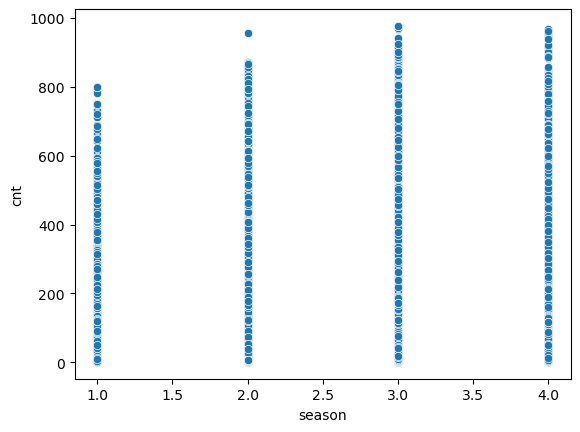

In [9]:
sns.scatterplot(x=data_hour['season'], y=data_hour['cnt'])

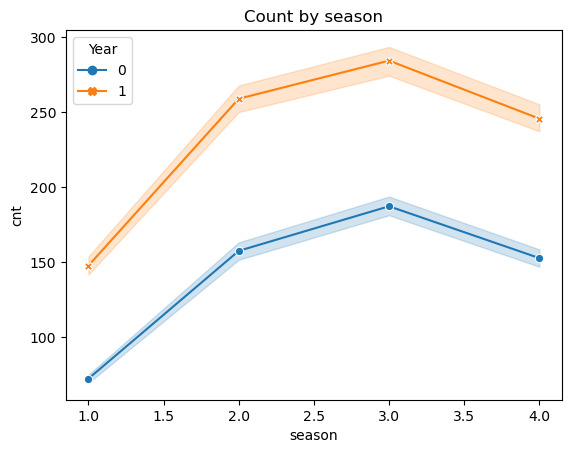

In [10]:
# Line plot - Count by season
ax =sns.lineplot(data=season_by_cnt, x="season", y="cnt", hue="yr", style="yr",
    markers=True, dashes=False).set(title='Count by season')
# plt.set_xticks(range(1,5), labels=['spring','summer','fall','winter'])
plt.legend(title='Year')
plt.show()

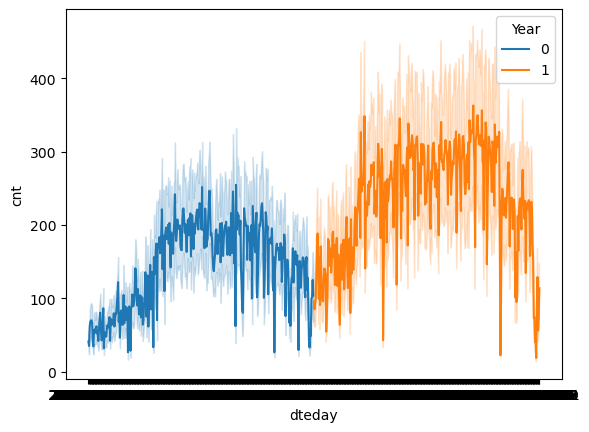

In [11]:
# Line plot - Count by day
ax = sns.lineplot(data=data_hour, x="dteday", y="cnt", hue="yr")
plt.legend(title='Year')
plt.show()

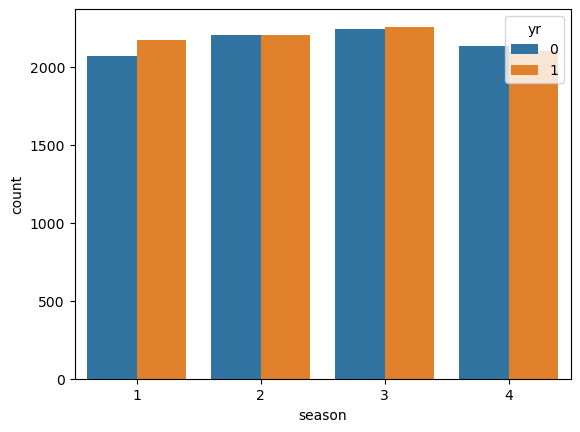

In [12]:
# Bar plot - Count by season
ax = sns.countplot(x=season_by_cnt['season'], hue="yr", data=season_by_cnt)
# plt.legend(title='Year')
plt.show()

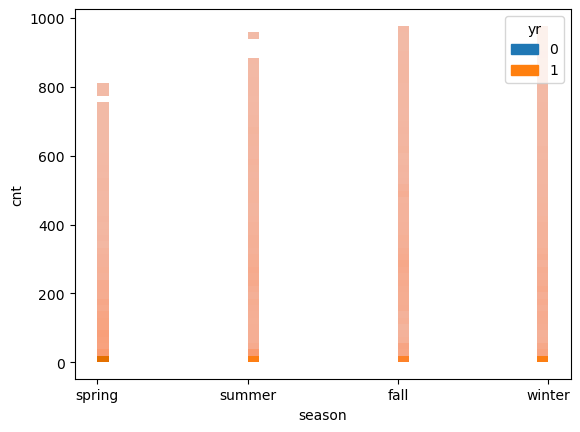

In [13]:
ax = sns.histplot(data=season_by_cnt, x='season', y='cnt', hue="yr", multiple="dodge")
ax.set_xticks(range(1,5), labels=['spring','summer','fall','winter'])
plt.show()

In [14]:
# ax =sns.histplot(data=season_by_cnt, x="dteday", y='cnt', hue="yr")
# # ax = sns.histplot(data=season_by_cnt, x=season_by_cnt["season"], hue="yr", multiple="dodge")
# # ax.set_xticks(range(1,5), labels=['spring','summer','fall','winter'])
# plt.show()

ValueError: Could not interpret value `dteday` for parameter `x`

In [16]:
summer = data_hour.loc[data_hour['season'] == 2]
winter = data_hour.loc[data_hour['season'] == 4]

In [17]:
summer['cnt'].describe()

count    4409.000000
mean      208.344069
std       188.362473
min         1.000000
25%        46.000000
50%       165.000000
75%       311.000000
max       957.000000
Name: cnt, dtype: float64

In [18]:
winter['cnt'].describe()

count    4232.000000
mean      198.868856
std       182.967972
min         1.000000
25%        46.000000
50%       155.500000
75%       295.000000
max       967.000000
Name: cnt, dtype: float64